In [1]:
from __future__ import division
import tqdm
import os
import sys
sys.path.append('/mnt/disk0/home/jianwei_leejw/scripts/TESPulseFitCode')
# sys.path.append('/workspace/projects/TES/scripts')
import numpy as np
import matplotlib
# matplotlib.use('nbAgg')
%matplotlib inline
import matplotlib.pyplot as plt
import glob
from lmfit import Model, Parameters
import pymc
import seaborn
from scipy.stats import norm
from scipy.signal import savgol_filter
from scipy.fftpack import fft, rfft, fftshift
import pickle
import time as datetime
import pandas

import heralded_pulses_analysis as hpa
import pulse_averaging_cw as pacw
import pulse_fit_v05 as pf
import pulse_fit_v06 as pf6
import single_photon_model_no_shift as noshift
import pulse_averaging as pa
import thres_poiss
import pulse_discrimination as pd
import thres
import stats_proc as sp

In [2]:
directories = ['/mnt/disk1/data/20170523_TES5_75mK_95uA_trise_115ns/doubles/',
              '/mnt/disk1/data/20170523_TES5_75mK_95uA_trise_115ns/doubles_more/',
              '/mnt/disk1/data/20170523_TES5_75mK_95uA_trise_115ns/doubles_more_more/',
              '/mnt/disk1/data/20170523_TES5_75mK_95uA_trise_115ns/doubles_more_more_more/']
results_directory = './'

In [3]:
data = pandas.read_csv(results_directory+'results_lmfit_only.csv')
print data[-1:];

     Unnamed: 0           fname  mcmc_flag  unequal_edges  one_x_offset_init  \
378           0  C2doubles15322      False          False             -2.593   

     one_amplitude_init  two_amplitude_init  two_x_offset_init  \
378                 NaN                 NaN                NaN   

     one_x_offset_fitted  one_amplitude_fitted  two_amplitude_fitted  \
378                  NaN                   NaN                   NaN   

     two_x_offset_fitted  
378                  NaN  


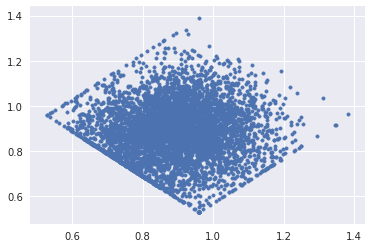

In [133]:
mask = (r['unequal_edges']==False)&(r['mcmc_flag']==False)
plt.figure()
plt.scatter(r[mask]['two_amplitude_fitted']
,r[mask]['one_amplitude_fitted'],marker='.')

In [134]:
data_mcmc = data[(data['mcmc_flag']==True)&(data['unequal_edges']==False)]
data_lmfit = data[(data['mcmc_flag']==False)&(data['unequal_edges']==False)]
one_x_offset = pandas.concat([data_mcmc['one_x_offset_init'],data_lmfit['one_x_offset_fitted']])
two_x_offset = pandas.concat([data_mcmc['two_x_offset_init'],data_lmfit['two_x_offset_fitted']])
one_amp = pandas.concat([data_mcmc['one_amplitude_init'],data_lmfit['one_amplitude_fitted']])
two_amp = pandas.concat([data_mcmc['two_amplitude_init'],data_lmfit['two_amplitude_fitted']])
g2 = one_x_offset - two_x_offset
# g2 = data_mcmc['one_x_offset_init']-data_mcmc['two_x_offset_init']
# g2_init = (data['one_x_offset_init']-data['two_x_offset_init'])

In [141]:
np.array(g2.abs())<400e-9

array([ True, False,  True, False, False,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

(array([ 10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  11.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

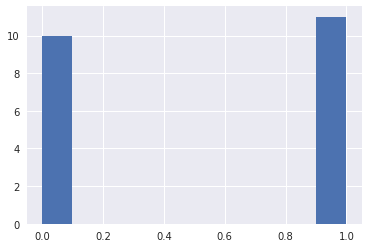

In [149]:
mask = (g2.abs()<1000e-9)
# np.sum(mask)
plt.figure()
plt.hist(np.array(data['mcmc_flag'])[mask])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8624 but corresponding boolean dimension is 8434
  """Entry point for launching an IPython kernel.


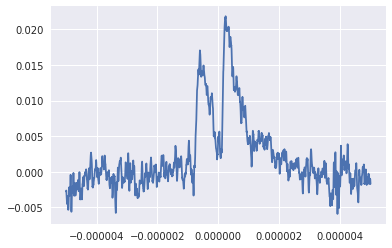

In [100]:
t,s = hpa.trace_extr(directories[0]+np.array(data['fname'])[mask][0]+'.trc',8.79108923e-03)
plt.figure()
plt.plot(t,s)